In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from methods import *
sns.set(rc = {'figure.figsize':(15,8)})


df = pd.read_csv('../data/analysis/test_2022-07-04.csv')
df['correct'] = df['y'] == df['pred']

In [2]:
n_labels = len(df['y'].unique())

In [3]:
accuracies_df = df.groupby(by=['method', 'seed']).sum()['correct'].reset_index()

test_samples = df.groupby(by=['method', 'seed']).count()['correct'].reset_index(drop=True)[0]

accuracies_df['accuracy'] = accuracies_df['correct']/test_samples

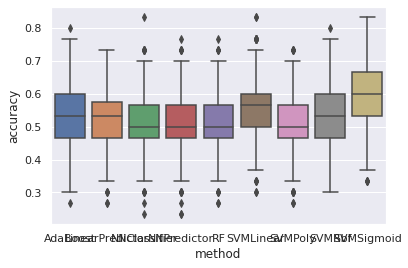

In [4]:
ax = sns.boxplot(x="method", y="accuracy", data=accuracies_df)

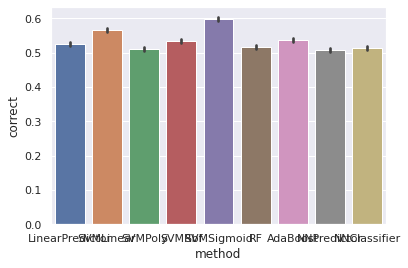

In [5]:
sns.barplot(x='method', y='correct', data=df)
plt.show()

In [6]:
df['method'].unique()

array(['LinearPredictor', 'SVMLinear', 'SVMPoly', 'SVMRbf', 'SVMSigmoid',
       'RF', 'AdaBoost', 'NNPredictor', 'NNClassifier'], dtype=object)

LinearPredictor


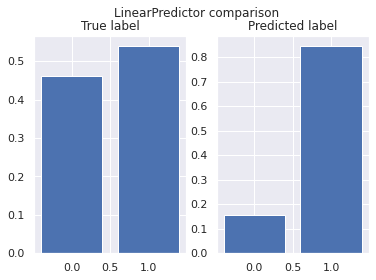

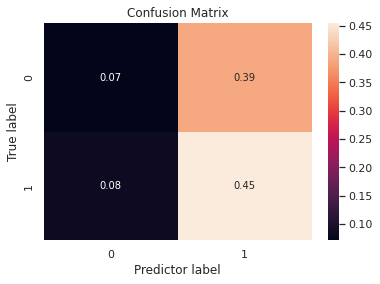

 Accuracy:  0.526 


SVMLinear


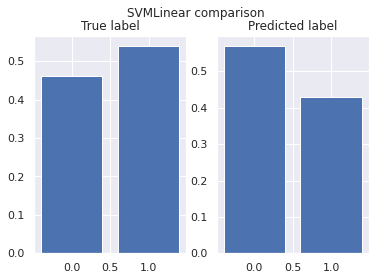

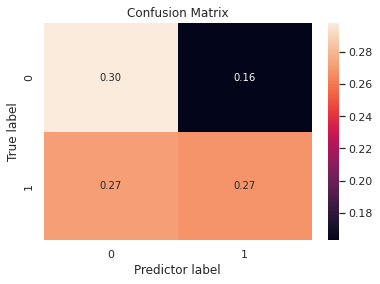

 Accuracy:  0.5660666666666667 


SVMPoly


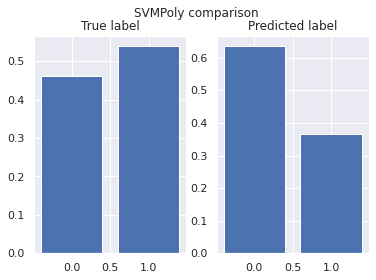

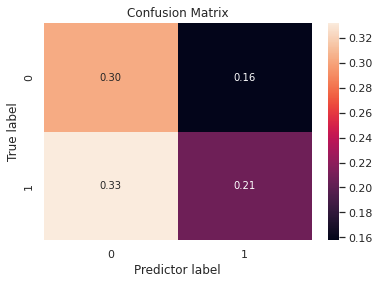

 Accuracy:  0.5102 


SVMRbf


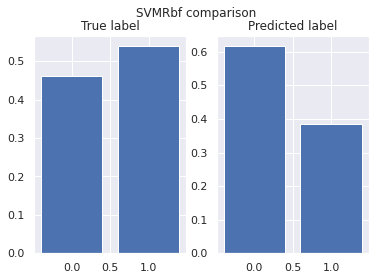

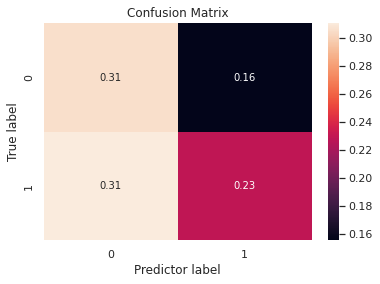

 Accuracy:  0.5341333333333333 


SVMSigmoid


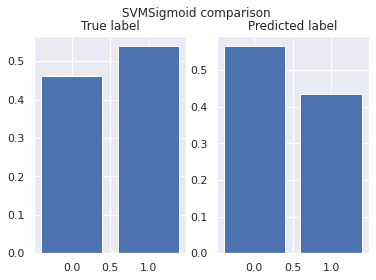

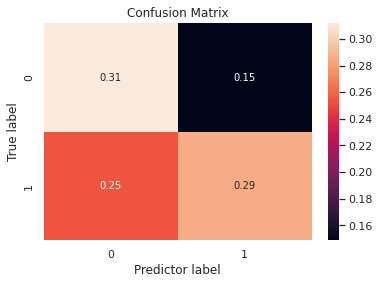

 Accuracy:  0.5976333333333333 


RF


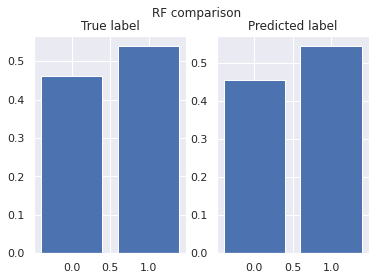

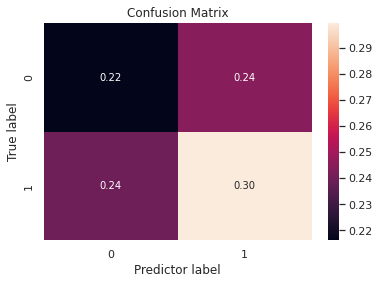

 Accuracy:  0.5157 


AdaBoost


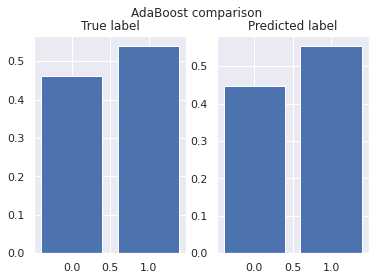

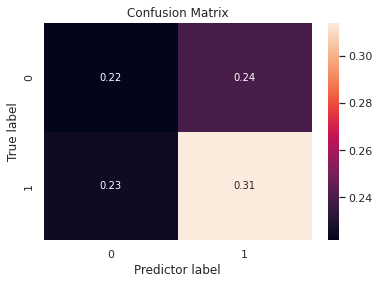

 Accuracy:  0.5358 


NNPredictor


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (3,).

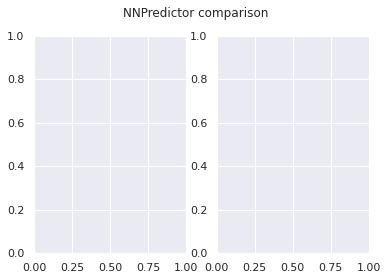

In [7]:
for method in df['method'].unique():
    print(method)

    method_df = df[df['method'] == method]

    cm = confusion_matrix(method_df['y'], method_df['pred'])
    cm = cm/cm.sum()

    fig, axs = plt.subplots(1,2)
    fig.suptitle(f'{method} comparison')
    axs[0].bar([i for i in range(n_labels)], cm.sum(axis=1))
    axs[0].title.set_text('True label')
    axs[1].bar([i for i in range(n_labels)], cm.sum(axis=0))
    axs[1].title.set_text('Predicted label')
    plt.show()

    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title('Confusion Matrix')
    plt.xlabel('Predictor label')
    plt.ylabel('True label')
    plt.show()




    print(' Accuracy: ', np.trace(cm),'\n\n')